<a href="https://colab.research.google.com/github/Maithili-Badhan/Cognitive-Load-Estimator/blob/main/Cognitive_Load_Estimator_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ziya07/emotional-monitoring-dataset

Dataset URL: https://www.kaggle.com/datasets/ziya07/emotional-monitoring-dataset
License(s): CC0-1.0
100% 72.7k/72.7k [00:00<00:00, 498kB/s]
100% 72.7k/72.7k [00:00<00:00, 497kB/s]


In [ ]:
import zipfile

zip_data = zipfile.ZipFile('/content/emotional-monitoring-dataset.zip')
zip_data.extractall()
zip_data.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/emotional_monitoring_dataset_with_target.csv")

In [ ]:
df.head()

HeartRate  SkinConductance        EEG  Temperature  PupilDiameter  \
0         61         8.937204  11.794946    36.501723       3.330181   
1         60        12.635397  19.151412    36.618910       3.428995   
2         81         3.660028   6.226098    36.176898       2.819286   
3        119         0.563070   4.542968    37.205293       2.192961   
4        118         0.477378   0.996209    37.248118       2.450139   

   SmileIntensity  FrownIntensity  CortisolLevel  ActivityLevel  \
0        0.689238        0.189024       0.603035            136   
1        0.561056        0.091367       0.566671            155   
2        0.417951        0.227355       1.422475             55   
3        0.140186        0.502965       1.669045             39   
4        0.064471        0.695604       1.854076             10   

   AmbientNoiseLevel  LightingLevel     EmotionalState CognitiveState  \
0                 59            394            engaged     distracted   
1                 39            479            engaged     distracted   
2                 30            832  partially engaged        focused   
3                 40            602         disengaged        focused   
4                 42            908         disengaged        focused   

   EngagementLevel  
0                3  
1                1  
2                3  
3                3  
4                3

# Exploratory Data Analysis

In [ ]:
df.shape

(1000, 14)

In [ ]:
df.columns

Index(['HeartRate', 'SkinConductance', 'EEG', 'Temperature', 'PupilDiameter',
       'SmileIntensity', 'FrownIntensity', 'CortisolLevel', 'ActivityLevel',
       'AmbientNoiseLevel', 'LightingLevel', 'EmotionalState',
       'CognitiveState', 'EngagementLevel'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HeartRate          1000 non-null   int64  
 1   SkinConductance    1000 non-null   float64
 2   EEG                1000 non-null   float64
 3   Temperature        1000 non-null   float64
 4   PupilDiameter      1000 non-null   float64
 5   SmileIntensity     1000 non-null   float64
 6   FrownIntensity     1000 non-null   float64
 7   CortisolLevel      1000 non-null   float64
 8   ActivityLevel      1000 non-null   int64  
 9   AmbientNoiseLevel  1000 non-null   int64  
 10  LightingLevel      1000 non-null   int64  
 11  EmotionalState     1000 non-null   object 
 12  CognitiveState     1000 non-null   object 
 13  EngagementLevel    1000 non-null   int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 109.5+ KB


In [ ]:
df.describe()

HeartRate  SkinConductance          EEG  Temperature  PupilDiameter  \
count  1000.000000      1000.000000  1000.000000  1000.000000    1000.000000   
mean     89.428000         4.886971     8.493616    36.745107       2.833396   
std      17.339651         4.187668     5.616052     0.435840       0.535909   
min      60.000000         0.008741     0.019809    36.000958       2.000573   
25%      75.000000         1.602463     3.993575    36.370811       2.398951   
50%      89.000000         3.413038     7.400188    36.743273       2.747615   
75%     105.000000         7.719411    13.004892    37.115120       3.228348   
max     119.000000        14.998714    19.987929    37.498955       3.996728   

       SmileIntensity  FrownIntensity  CortisolLevel  ActivityLevel  \
count     1000.000000     1000.000000    1000.000000    1000.000000   
mean         0.422318        0.348089       1.242361      83.349000   
std          0.282820        0.236208       0.430722      54.734642   
min          0.000875        0.000050       0.500255       0.000000   
25%          0.155963        0.155691       0.860270      39.000000   
50%          0.397790        0.290736       1.252747      76.000000   
75%          0.650723        0.573842       1.612069     124.000000   
max          0.998751        0.799369       1.999461     199.000000   

       AmbientNoiseLevel  LightingLevel  EngagementLevel  
count        1000.000000    1000.000000      1000.000000  
mean           44.585000     655.651000         2.482000  
std             8.672369     197.732236         0.666423  
min            30.000000     302.000000         1.000000  
25%            37.000000     487.750000         2.000000  
50%            44.000000     654.500000         3.000000  
75%            52.000000     822.250000         3.000000  
max            59.000000     999.000000         3.000000

<Axes: >

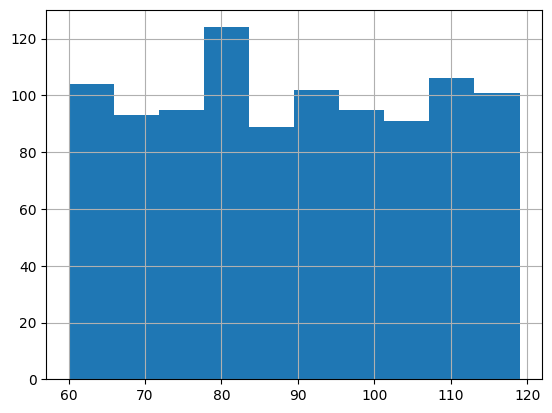

In [ ]:
df.HeartRate.hist()

<Axes: >

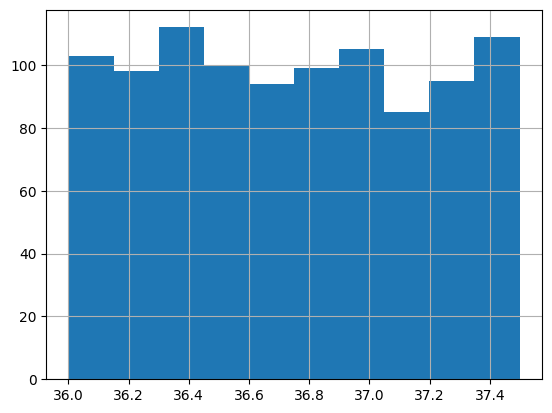

In [ ]:
df.Temperature.hist()

In [ ]:
df.isnull().sum()

HeartRate            0
SkinConductance      0
EEG                  0
Temperature          0
PupilDiameter        0
SmileIntensity       0
FrownIntensity       0
CortisolLevel        0
ActivityLevel        0
AmbientNoiseLevel    0
LightingLevel        0
EmotionalState       0
CognitiveState       0
EngagementLevel      0
dtype: int64

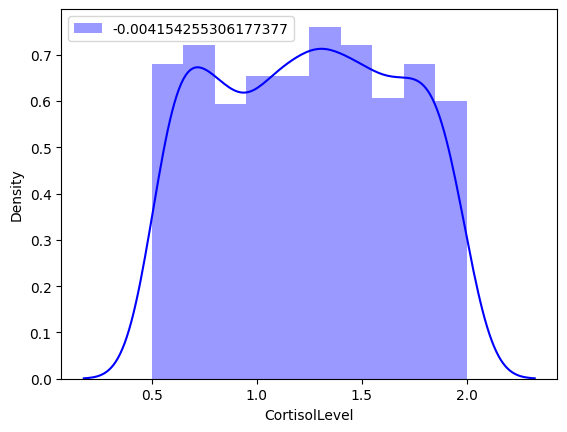

In [ ]:
sns.distplot(df['CortisolLevel'], label=df['CortisolLevel'].skew(), color = 'b')
plt.legend()
plt.show()

In [ ]:
def attribute_info(df_feature):
  print(f'Value Counts: \n{df_feature.value_counts()} \n')

In [ ]:
for col in df:
  print(f'\033[1m ---------------------------------------------{col}----------------------------------')
  attribute_info(df[col])
  print('\n\n')

 ---------------------------------------------HeartRate----------------------------------
Value Counts: 
HeartRate
107    24
79     24
99     23
69     23
64     22
117    22
83     22
80     21
82     21
92     21
95     20
81     20
97     19
110    19
111    19
61     19
60     18
70     18
66     18
109    18
114    18
108    18
76     18
103    17
77     17
63     17
90     17
65     17
74     17
119    17
112    17
86     17
78     16
88     16
94     16
84     16
93     16
116    15
98     15
96     15
72     15
85     15
113    15
118    15
102    15
75     14
68     14
105    14
73     14
100    14
115    14
89     13
104    12
87     12
91     12
71     12
62     11
106     9
101     9
67      8
Name: count, dtype: int64 




 ---------------------------------------------SkinConductance----------------------------------
Value Counts: 
SkinConductance
4.676070     1
8.937204     1
12.635397    1
3.660028     1
0.563070     1
            ..
8.822559     1
13.156218    1
1.71151

# Outlier Detection

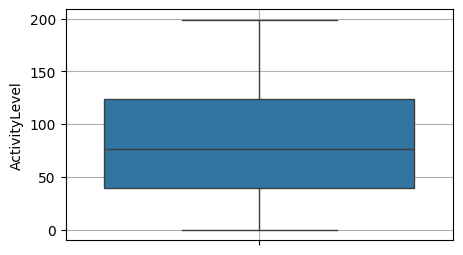

In [ ]:
plt.figure(figsize = (5,3))
sns.boxplot(df['ActivityLevel'])
plt.grid()
plt.show()

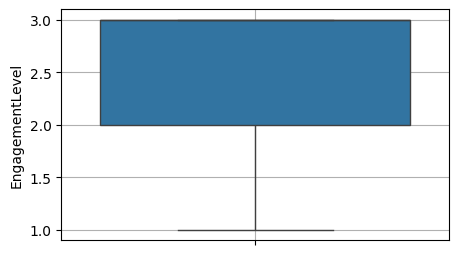

In [ ]:
plt.figure(figsize = (5,3))
sns.boxplot(df['EngagementLevel'])
plt.grid()
plt.show()

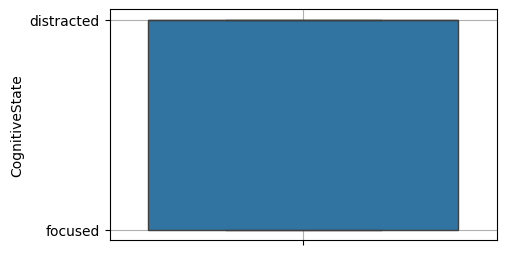

In [ ]:
plt.figure(figsize = (5,3))
sns.boxplot(df['CognitiveState'])
plt.grid()
plt.show()

In [ ]:
df['CognitiveState'] = df['CognitiveState'].map({'distracted':1, 'focused':2})
df['EmotionalState'] = df['EmotionalState'].map({'partially engaged': 1, 'engaged':2, 'disengaged':3})

In [ ]:
df

HeartRate  SkinConductance        EEG  Temperature  PupilDiameter  \
0           61         8.937204  11.794946    36.501723       3.330181   
1           60        12.635397  19.151412    36.618910       3.428995   
2           81         3.660028   6.226098    36.176898       2.819286   
3          119         0.563070   4.542968    37.205293       2.192961   
4          118         0.477378   0.996209    37.248118       2.450139   
..         ...              ...        ...          ...            ...   
995         98         3.897648   7.681519    36.274526       2.624275   
996        109         0.439062   0.352790    37.173929       2.489483   
997        108         1.077287   1.836462    37.073454       2.370298   
998         76        14.260010  19.309704    36.708047       3.393744   
999         85         4.676070   8.612581    36.053343       2.527295   

     SmileIntensity  FrownIntensity  CortisolLevel  ActivityLevel  \
0          0.689238        0.189024       0.603035            136   
1          0.561056        0.091367       0.566671            155   
2          0.417951        0.227355       1.422475             55   
3          0.140186        0.502965       1.669045             39   
4          0.064471        0.695604       1.854076             10   
..              ...             ...            ...            ...   
995        0.404309        0.204719       1.215872             65   
996        0.070776        0.638161       1.826544             23   
997        0.011001        0.595518       1.781096              8   
998        0.653693        0.171151       0.783958            110   
999        0.460965        0.361972       1.060261             73   

     AmbientNoiseLevel  LightingLevel  EmotionalState  CognitiveState  \
0                   59            394               2               1   
1                   39            479               2               1   
2                   30            832               1               2   
3                   40            602               3               2   
4                   42            908               3               2   
..                 ...            ...             ...             ...   
995                 50            913               1               1   
996                 43            642               3               1   
997                 43            620               3               1   
998                 38            779               2               1   
999                 57            797               1               1   

     EngagementLevel  
0                  3  
1                  1  
2                  3  
3                  3  
4                  3  
..               ...  
995                2  
996                2  
997                2  
998                1  
999                3  

[1000 rows x 14 columns]

In [ ]:
df.corr()

HeartRate  SkinConductance       EEG  Temperature  \
HeartRate           1.000000        -0.813819 -0.863343     0.451586   
SkinConductance    -0.813819         1.000000  0.844412    -0.198423   
EEG                -0.863343         0.844412  1.000000    -0.319207   
Temperature         0.451586        -0.198423 -0.319207     1.000000   
PupilDiameter      -0.865648         0.827216  0.873858    -0.333245   
SmileIntensity     -0.888055         0.833440  0.880789    -0.386343   
FrownIntensity      0.886961        -0.786524 -0.845877     0.566185   
CortisolLevel       0.891824        -0.834193 -0.874679     0.421758   
ActivityLevel      -0.867075         0.829733  0.870659    -0.332277   
AmbientNoiseLevel   0.011853        -0.037694 -0.020489    -0.024071   
LightingLevel      -0.001664        -0.010090  0.006047     0.002930   
EmotionalState      0.467177        -0.211073 -0.330382     0.943011   
CognitiveState      0.013984         0.016113 -0.009702     0.026029   
EngagementLevel     0.037396        -0.230096 -0.178328     0.039114   

                   PupilDiameter  SmileIntensity  FrownIntensity  \
HeartRate              -0.865648       -0.888055        0.886961   
SkinConductance         0.827216        0.833440       -0.786524   
EEG                     0.873858        0.880789       -0.845877   
Temperature            -0.333245       -0.386343        0.566185   
PupilDiameter           1.000000        0.880923       -0.854949   
SmileIntensity          0.880923        1.000000       -0.878329   
FrownIntensity         -0.854949       -0.878329        1.000000   
CortisolLevel          -0.876244       -0.895058        0.887497   
ActivityLevel           0.861440        0.873936       -0.848265   
AmbientNoiseLevel      -0.006726       -0.001403        0.016839   
LightingLevel           0.003352        0.000535        0.003771   
EmotionalState         -0.348571       -0.405772        0.599091   
CognitiveState          0.010244       -0.010568        0.007283   
EngagementLevel        -0.059751       -0.064892        0.066387   

                   CortisolLevel  ActivityLevel  AmbientNoiseLevel  \
HeartRate               0.891824      -0.867075           0.011853   
SkinConductance        -0.834193       0.829733          -0.037694   
EEG                    -0.874679       0.870659          -0.020489   
Temperature             0.421758      -0.332277          -0.024071   
PupilDiameter          -0.876244       0.861440          -0.006726   
SmileIntensity         -0.895058       0.873936          -0.001403   
FrownIntensity          0.887497      -0.848265           0.016839   
CortisolLevel           1.000000      -0.872264           0.012014   
ActivityLevel          -0.872264       1.000000          -0.002290   
AmbientNoiseLevel       0.012014      -0.002290           1.000000   
LightingLevel          -0.002602      -0.000173           0.020633   
EmotionalState          0.447258      -0.351506          -0.010280   
CognitiveState          0.018434       0.001328          -0.016204   
EngagementLevel         0.069689      -0.067789           0.029449   

                   LightingLevel  EmotionalState  CognitiveState  \
HeartRate              -0.001664        0.467177        0.013984   
SkinConductance        -0.010090       -0.211073        0.016113   
EEG                     0.006047       -0.330382       -0.009702   
Temperature             0.002930        0.943011        0.026029   
PupilDiameter           0.003352       -0.348571        0.010244   
SmileIntensity          0.000535       -0.405772       -0.010568   
FrownIntensity          0.003771        0.599091        0.007283   
CortisolLevel          -0.002602        0.447258        0.018434   
ActivityLevel          -0.000173       -0.351506        0.001328   
AmbientNoiseLevel       0.020633       -0.010280       -0.016204   
LightingLevel           1.000000       -0.008697        0.023887   
EmotionalState         -0.008697        1.000000  

<Axes: >

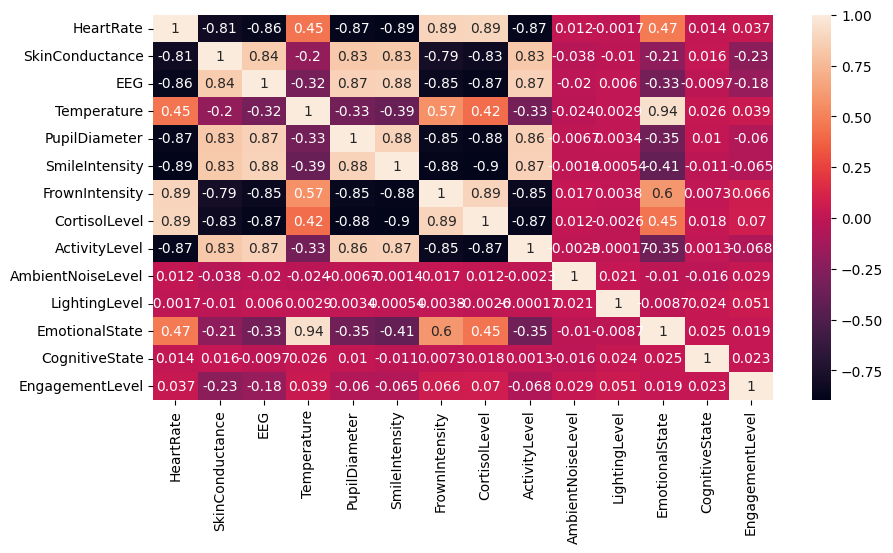

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True)

In [ ]:
dcor = abs(df.corr()['EngagementLevel']).sort_values(ascending = False)
dcor

EngagementLevel      1.000000
SkinConductance      0.230096
EEG                  0.178328
CortisolLevel        0.069689
ActivityLevel        0.067789
FrownIntensity       0.066387
SmileIntensity       0.064892
PupilDiameter        0.059751
LightingLevel        0.051323
Temperature          0.039114
HeartRate            0.037396
AmbientNoiseLevel    0.029449
CognitiveState       0.022543
EmotionalState       0.019356
Name: EngagementLevel, dtype: float64

# Model Building

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X = df.drop('EngagementLevel', axis = 1)
y = df['EngagementLevel']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train a logistic regression model
lr_model = LogisticRegression(multi_class="auto", solver="lbfgs", max_iter=500)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=500, multi_class='auto')

Accuracy: 0.7050
              precision    recall  f1-score   support

           1       0.88      0.88      0.88        26
           2       0.60      0.54      0.57        65
           3       0.72      0.76      0.74       109

    accuracy                           0.70       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.70      0.70      0.70       200



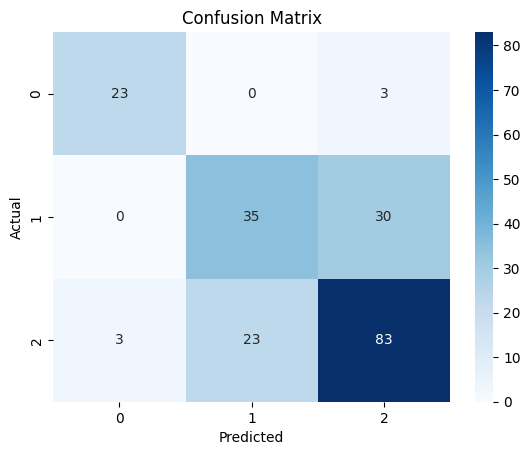

In [ ]:
# Predict on test data
y_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in le.classes_]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
train_acc = accuracy_score(y_train, lr_model.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

Training Accuracy: 0.6825
Testing Accuracy: 0.7050


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(
    n_estimators=50,  # Reduce number of trees
    max_depth=3,  # Limit tree depth
    min_samples_split=10,  # Minimum samples required to split
    min_samples_leaf=4,  # Minimum samples in leaf node
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Cross-validation for better evaluation
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Random Forest Accuracy: 0.9400
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        26
           1       1.00      1.00      1.00        65
           2       0.90      1.00      0.95       109

    accuracy                           0.94       200
   macro avg       0.97      0.85      0.88       200
weighted avg       0.95      0.94      0.93       200

Cross-Validation Accuracy: 0.9720 ± 0.0194


## SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel="rbf", C=1, gamma="scale", class_weight="balanced", probability=True)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.865
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        26
           1       0.82      0.98      0.90        65
           2       0.99      0.76      0.86       109

    accuracy                           0.86       200
   macro avg       0.83      0.92      0.86       200
weighted avg       0.89      0.86      0.87       200



# Model Comparison

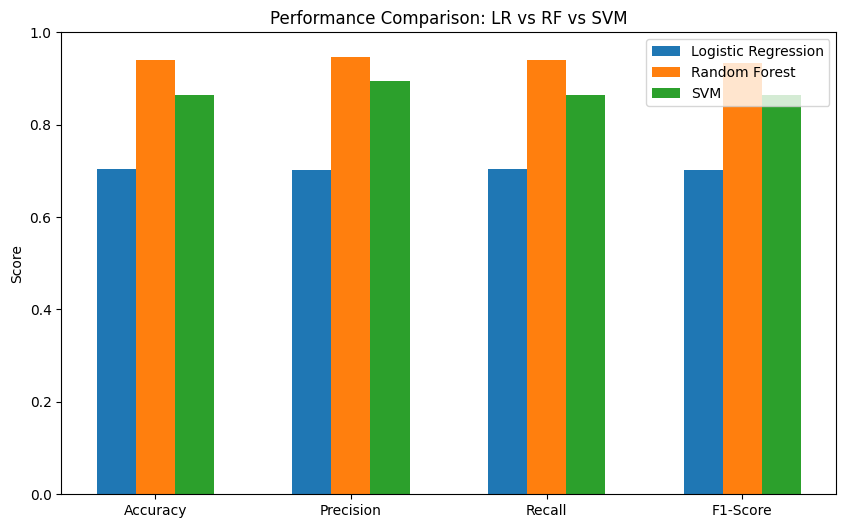

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store model results in a dictionary
model_results = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred, average="weighted"),
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf, average="weighted"),
        "Recall": recall_score(y_test, y_pred_rf, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred_rf, average="weighted"),
    },
    "SVM": {
        "Accuracy": accuracy_score(y_test, y_pred_svm),
        "Precision": precision_score(y_test, y_pred_svm, average="weighted"),
        "Recall": recall_score(y_test, y_pred_svm, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred_svm, average="weighted"),
    },
}

# Convert dictionary to NumPy array
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
scores = np.array([[model_results[model][metric] for metric in metrics] for model in model_results])

# Bar plot
bar_width = 0.2
x = np.arange(len(metrics))

plt.figure(figsize=(10, 6))
for i, (model, score) in enumerate(model_results.items()):
    plt.bar(x + i * bar_width, list(score.values()), width=bar_width, label=model)

plt.xticks(x + bar_width, metrics)
plt.ylabel("Score")
plt.title("Performance Comparison: LR vs RF vs SVM")
plt.legend()
plt.ylim(0, 1)
plt.show()

In [ ]:
pip install lime

# LIME Explainer


🔍 LIME Explanation for Logistic Regression:


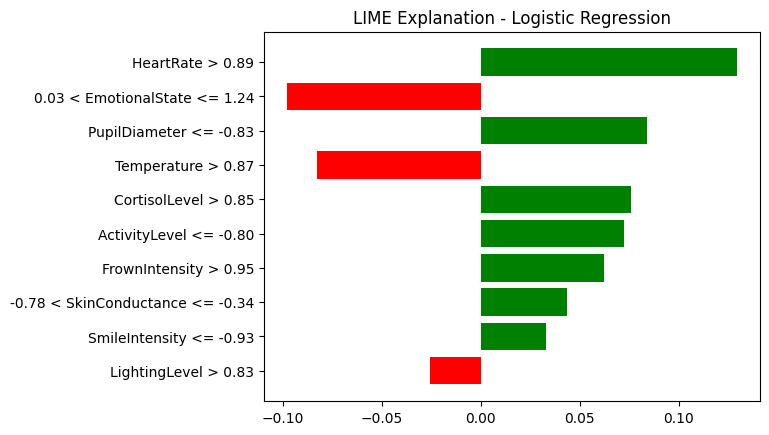


🔍 LIME Explanation for Random Forest:


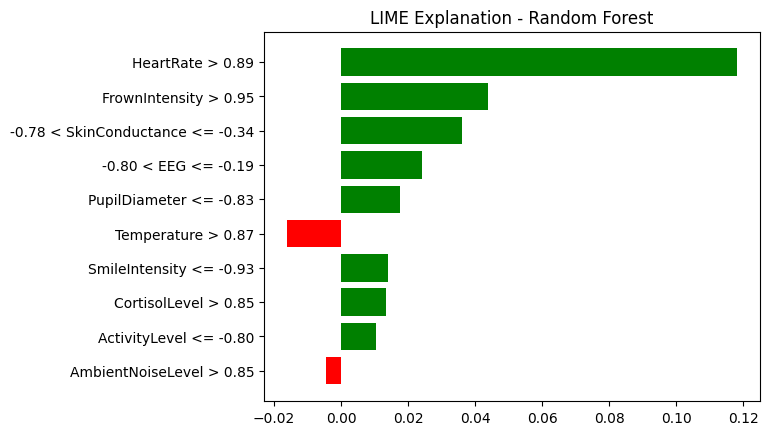


🔍 LIME Explanation for SVM (requires probability=True):


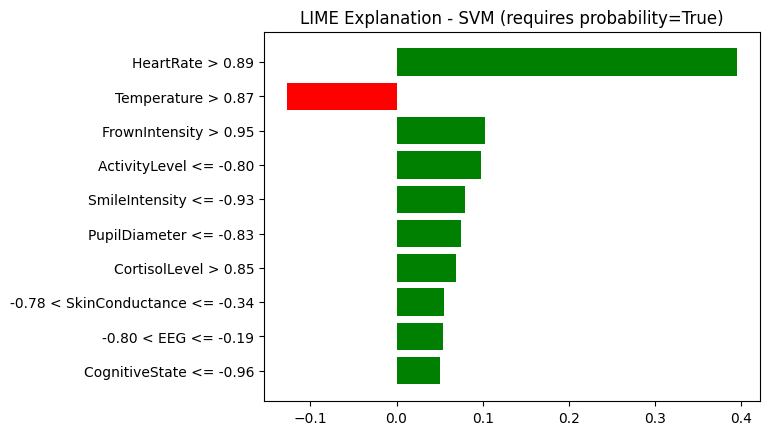

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=X.columns,
    class_names=le.classes_,
    discretize_continuous=True
)

# Select a test instance to explain
idx = np.random.randint(0, X_test.shape[0])  # Pick a random test sample
sample = X_test[idx].reshape(1, -1)

# Function to explain model predictions
def explain_model(model, model_name):
    exp = explainer.explain_instance(sample.flatten(), model.predict_proba)
    print(f"\n🔍 LIME Explanation for {model_name}:")
    exp.show_in_notebook()
    exp.as_pyplot_figure()
    plt.title(f"LIME Explanation - {model_name}")
    plt.show()

# Explain each model
explain_model(lr_model, "Logistic Regression")
explain_model(rf_model, "Random Forest")
explain_model(svm_model, "SVM (requires probability=True)")

# Conclusion

If Class 0 is Critical (e.g., detecting high cognitive load in critical situations):
➡ Use SVM (perfect recall for Class 0).

If Overall Accuracy & Stability Matter:
➡ Stick with Random Forest (better balance across classes).